In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
from pandas import Series
import pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [113]:
import features_finance as ff
import ETDlearning as ETD
import parameters_finance as pf
import TDlearning as TD
import data_finance

##  <center> DATA: IMPORT, NORMALIZATION MinMax </center>

In [67]:
dataStock = np.genfromtxt('data_finance.csv', delimiter=",",usecols=(1))

The scaler requires data to be provided as a matrix of rows and columns. The loaded time series data is loaded as a Pandas Series. It must then be reshaped into a matrix of one column with as many rows as there are observations. 

The reshaped dataset is then used to fit the scaler, the dataset is normalized, then the normalization transform is inverted to show the original values again.

In [75]:
# load the dataset and print the first 5 rows
series = Series.from_csv('data_finance.csv',header=None)
# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)

Min: 40.750000, Max: 154.000000


In [76]:
data_array = np.zeros((np.shape(normalized)[0],1))
for i in range(table1.shape[0]) : 
    data_array[i,0] = normalized[i]
data_array = np.flipud(data_array)    
data_array = ff.SMA(data_array,20)
data_array = ff.SMA(data_array,5)

In [94]:
experiments_results = dict()

### <center> EXPERIMENT 1 </center>
* $\gamma(s)$, $\lambda(s)$ and $i(s)$ constant $\forall s$
* BASIC FEATURES (4 PREVIOUS STATES)

In [77]:
reload(ff)
reload(ETD)
reload(pf)

<module 'parameters_finance' from 'parameters_finance.pyc'>

In [96]:
model_features = ff.motherFeatures(data_array,n_p)
fonction_features = model_features.basicFeatures

n_p = 4 # NB PREVIOUS STATES
t_start = 700
t_end = 10000

exp1 = ETD.experimentsETDL(t_start,t_end,n_p,data_array)

In [97]:
interest = 1
coeff_alpha = 1
gamma = 0.9
lda = 0.7
nF = model_features.nbFeatures
finalTable1,observations1,means_episodes1 = exp1.predictWithETD(interest,coeff_alpha,gamma,'constant',lda,nF,fonction_features)
experiments_results['1'] = means_episodes1

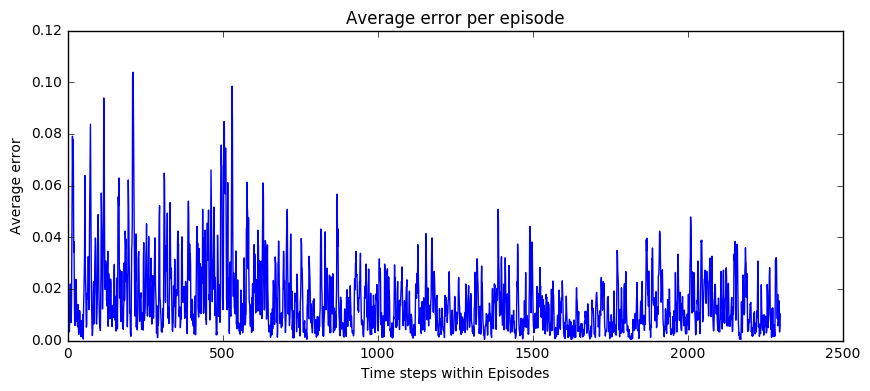

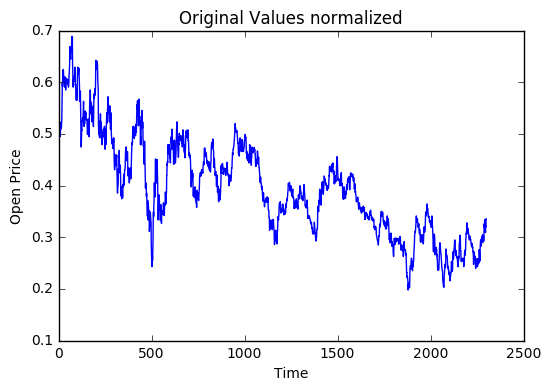

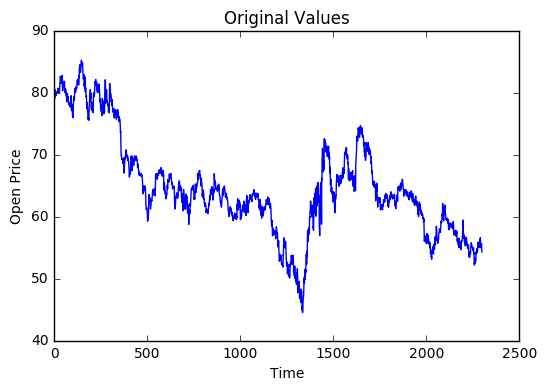

In [80]:
plt.figure(figsize = (10,4))
plt.plot(range(len(means_episodes1)),means_episodes1)
plt.xlabel('Time steps within Episodes')
plt.ylabel('Average error')
plt.title('Average error per episode')
plt.show()

plt.plot(range(t_end-t_start),data_array[t_start:t_end,0])
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Original Values normalized')
plt.plot()
plt.show()

plt.plot(range(t_end-t_start),dataStock[t_start:t_end])
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Original Values')
plt.plot()
plt.show()

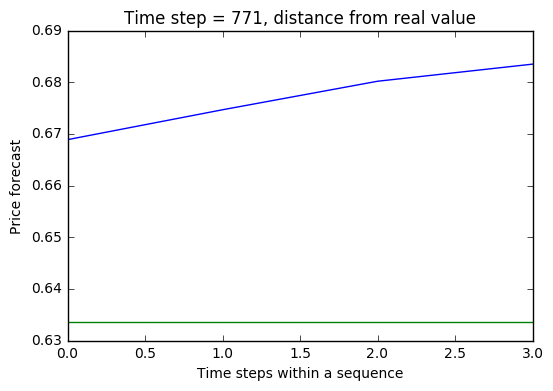

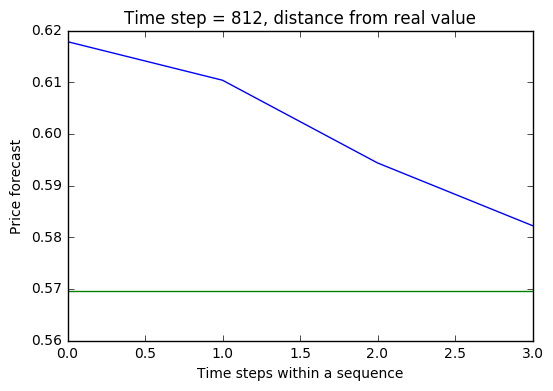

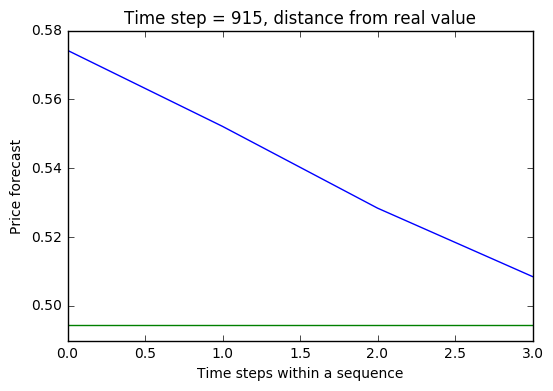

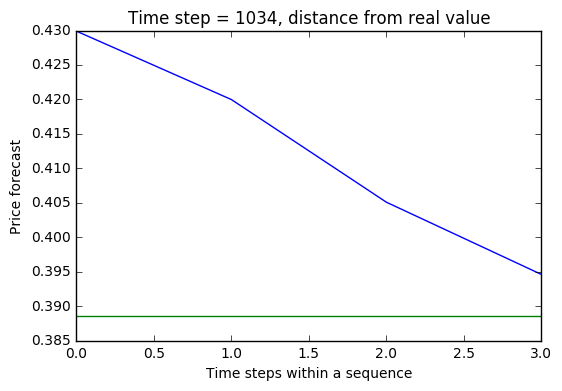

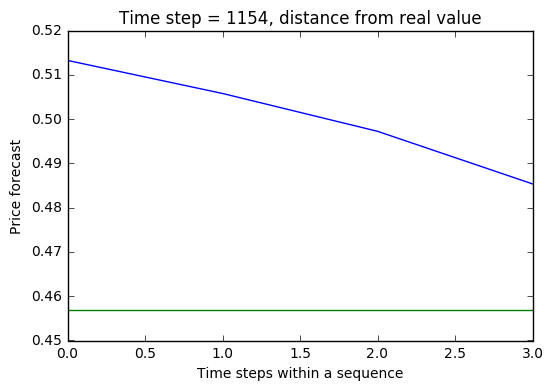

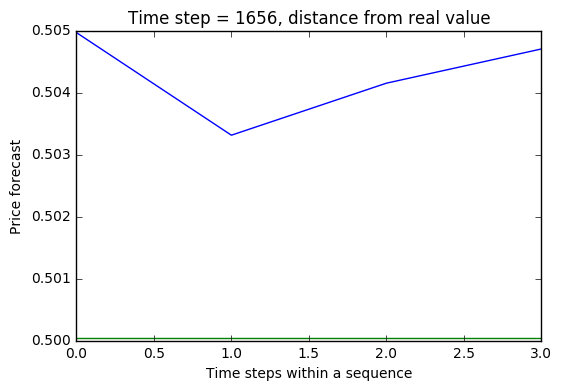

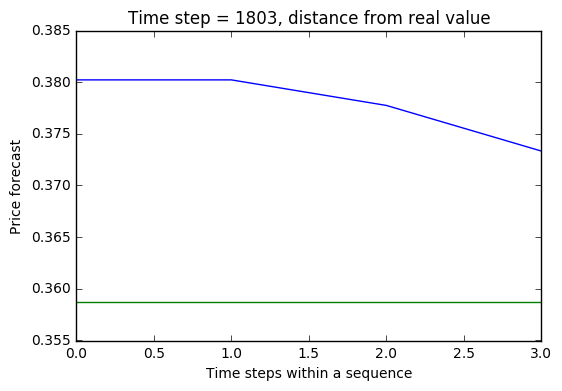

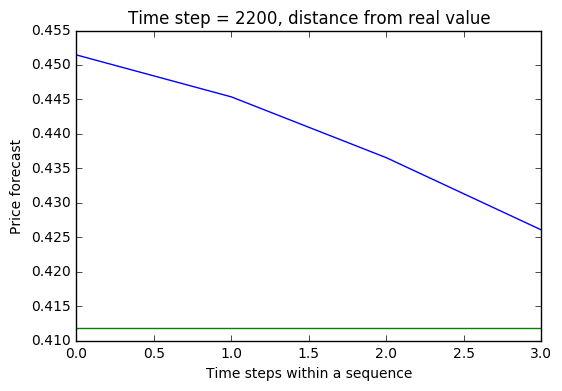

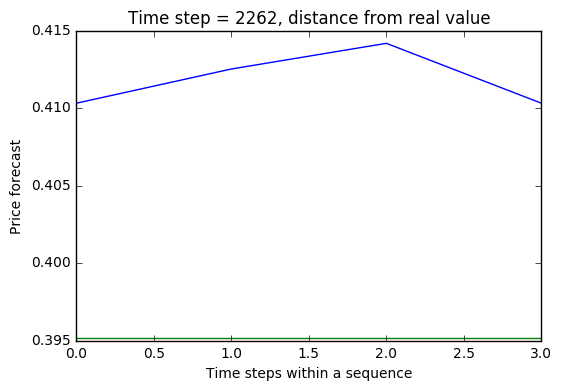

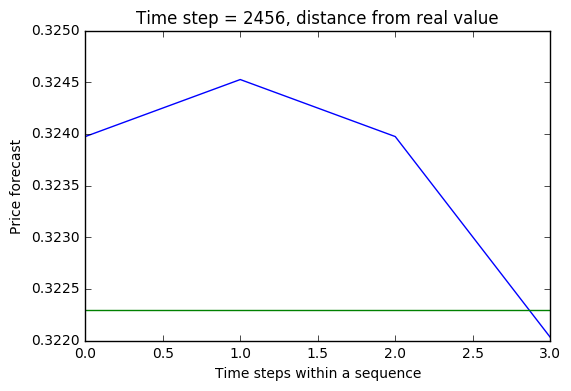

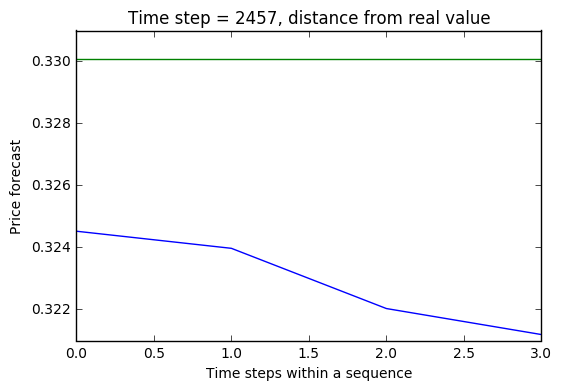

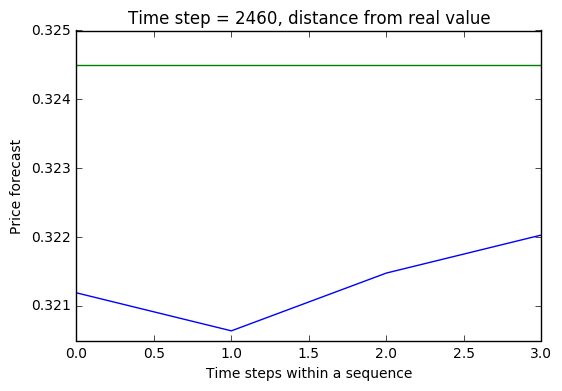

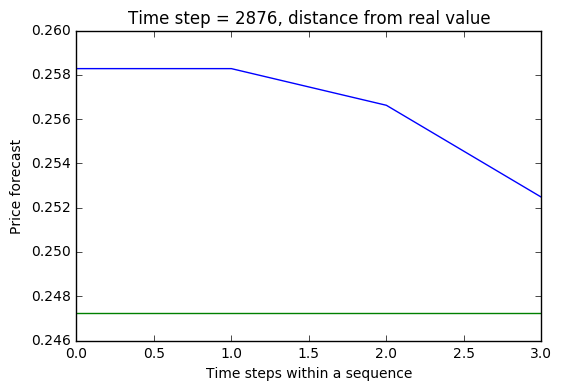

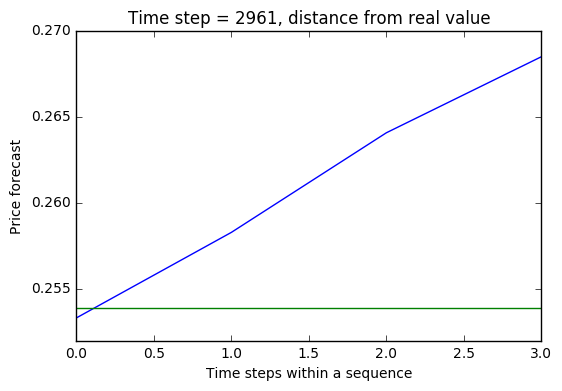

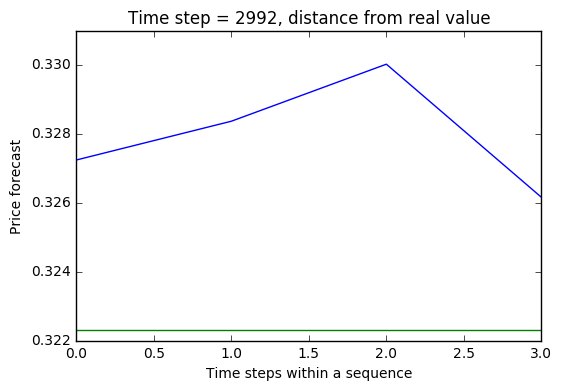

In [82]:
nbGraphs = len(observations1)
for j in range(nbGraphs) : 
    time = observations1[j][0]
    trueV = observations1[j][1]
    estimations = observations1[j][2]
    plt.plot(range(len(estimations)),estimations)
    plt.plot(range(len(estimations)),[trueV]*len(estimations))
    plt.xlabel('Time steps within a sequence')
    plt.ylabel('Price forecast')
    plt.title('Time step = %s, distance from real value'%time)
    plt.show()

### <center> EXPERIMENT 2 </center>
* $\gamma(s)$, $\lambda(s)$ and $i(s)$ constant $\forall s$
* 4 previous states
* 20 MA
* 5 MA
* Trend from the 3 previous days
* alpha reduced over time

In [212]:
reload(ff)
reload(ETD)

<module 'ETDlearning' from 'ETDlearning.py'>

In [98]:
t_start = 700
t_end = 10000
n_p = 10 # history for open prices
h_20 = 7 # history for the MA 5 and 20
h_5 = 6
z = 4 # history for the trend
sup_class = ff.motherFeatures(data_array,n_p)
model1_feat = ff.model1(sup_class,data_array,h_20,h_5,z)
fonction_features2 = model1_feat.getFeatures
nF = model1_feat.nbFeatures

# learning
interest = 1
coeffAlpha = 1 
gamma = 0.9
lda = 0.3

exp2= ETD.experimentsETDL(t_start,t_end,n_p,data_array)
table2,observations2,means_episodes2 = exp2.predictWithETD(interest,coeff_alpha,gamma,'constant',lda,nF,fonction_features2)
experiments_results['2'] = means_episodes2

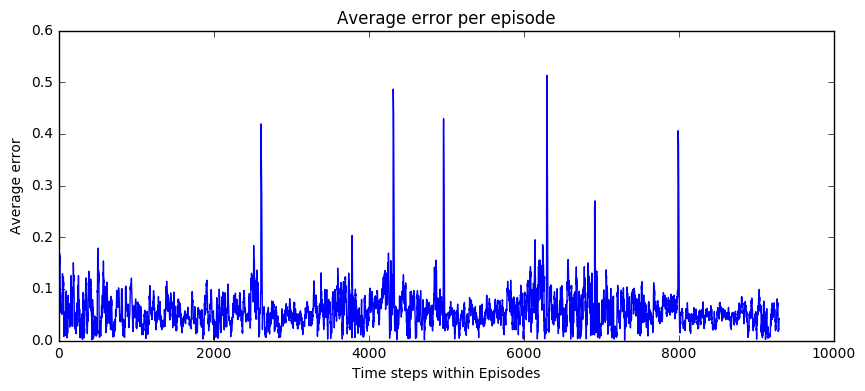

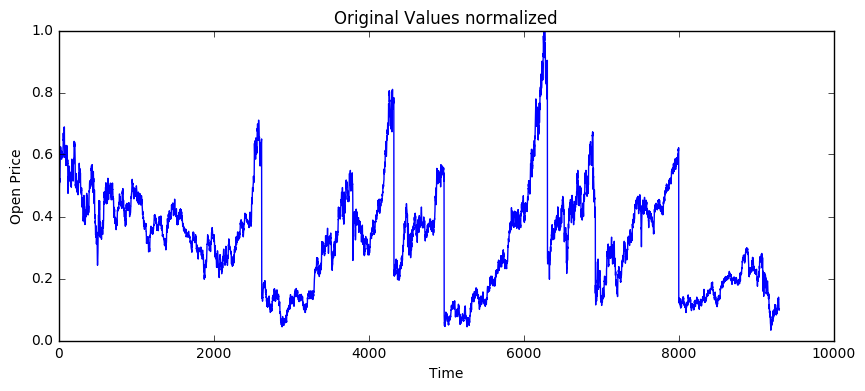

In [87]:
plt.figure(figsize = (10,4))
plt.plot(range(len(means_episodes2)),means_episodes2)
plt.xlabel('Time steps within Episodes')
plt.ylabel('Average error')
plt.title('Average error per episode')
plt.show()

plt.figure(figsize = (10,4))
plt.plot(range(t_end-t_start),data_array[t_start:t_end,0])
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Original Values normalized')
plt.plot()
plt.show()

### <center> EXPERIMENT 3 </center>
* 4 previous states
* 20 MA
* 5 MA
* 20 MA from the h_20 previous days
* 5 MA from the h_5 previous days
* Trend from the z previous days
* alpha reduced over time
* lambda increasing for the values closer

In [88]:
reload(ff)
reload(ETD)
reload(pf)

<module 'parameters_finance' from 'parameters_finance.pyc'>

In [89]:
interest

1

In [99]:
n_p = 10 # history for open prices
h_20 = 7 # history for the MA 5 and 20
h_5 = 6
z = 4 # history for the trend
t_start = 700
t_end = 10000

sup_class = ff.motherFeatures(data_array,n_p)
model1_feat = ff.model1(sup_class,data_array,h_20,h_5,z)
fonction_features2 = model1_feat.getFeatures
nF = model1_feat.nbFeatures

fonction1 = pf.model1_lambda

# learning
interest = 1
coeffAlpha = 1
gamma = 0.9
lda = 0.7

exp3 = ETD.experimentsETDL(t_start,t_end,n_p,data_array)
table3,observations3,means_episodes3 = exp3.predictWithETD(interest,coeff_alpha,gamma,'model 1',lda,nF,fonction_features2)
experiments_results['3'] = means_episodes3

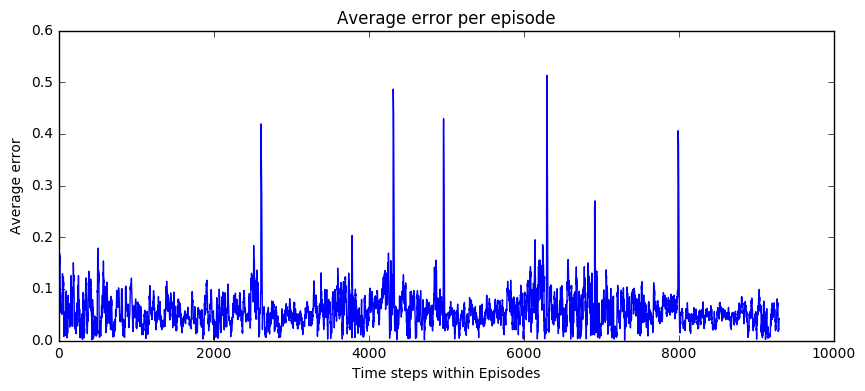

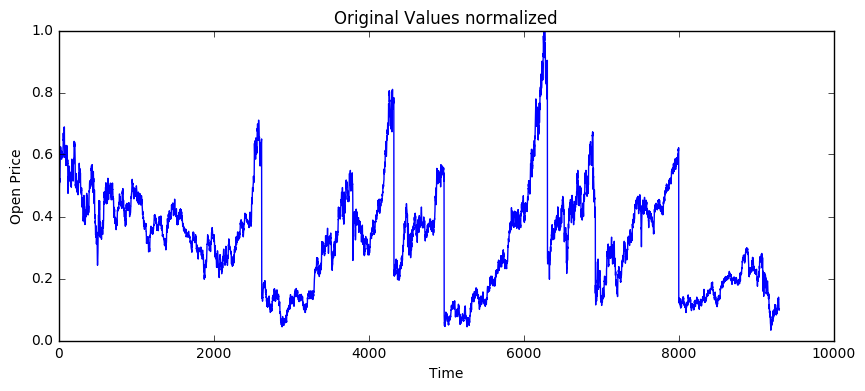

In [92]:
plt.figure(figsize = (10,4))
plt.plot(range(len(means_episodes3)),means_episodes3)
plt.xlabel('Time steps within Episodes')
plt.ylabel('Average error')
plt.title('Average error per episode')
plt.show()

plt.figure(figsize = (10,4))
plt.plot(range(t_end-t_start),data_array[t_start:t_end,0])
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Original Values normalized')
plt.plot()
plt.show()

### <center> EXPERIMENT 4 </center>
* 4 previous states
* 20 MA
* 5 MA
* 20 MA from the h_20 previous days
* 5 MA from the h_5 previous days
* Trend from the z previous days
* alpha reduced over time
* lambda increasing for the values closer
* random interests

In [104]:
reload(ff)
reload(ETD)
reload(pf)

<module 'parameters_finance' from 'parameters_finance.pyc'>

In [101]:
n_p = 10 # history for open prices
h_20 = 7 # history for the MA 5 and 20
h_5 = 6
z = 4 # history for the trend
t_start = 700
t_end = 10000

sup_class = ff.motherFeatures(data_array,n_p)
model1_feat = ff.model1(sup_class,data_array,h_20,h_5,z)
fonction_features2 = model1_feat.getFeatures
nF = model1_feat.nbFeatures

# learning
coeffAlpha = 1
gamma = 0.9
lda = 0.7

exp4 = ETD.experimentsETDL(t_start,t_end,n_p,data_array)
table4,observations4,means_episodes4 = exp4.predictWithETD_randomI(coeffAlpha,gamma,lda,nF,fonction_features2)
experiments_results['4'] = means_episodes4

### <center> EXPERIMENT 5 </center>
* 4 previous states
* 20 MA
* 5 MA
* 20 MA from the h_20 previous days
* 5 MA from the h_5 previous days
* Trend from the z previous days
* alpha reduced over time
* lambda increasing for the values closer
* interest function relative to bumps

In [105]:
n_p = 10 # history for open prices
h_20 = 7 # history for the MA 5 and 20
h_5 = 6
z = 4 # history for the trend
t_start = 700
t_end = 10000

sup_class = ff.motherFeatures(data_array,n_p)
model1_feat = ff.model1(sup_class,data_array,h_20,h_5,z)
fonction_features2 = model1_feat.getFeatures
nF = model1_feat.nbFeatures

fonction_int1 = pf.model1_interest
# learning
coeffAlpha = 1
gamma = 0.9
lda = 0.7

exp5 = ETD.experimentsETDL(t_start,t_end,n_p,data_array)
table5,observations5,means_episodes5 = exp5.predictWithETD_interestBumps(fonction_int1,coeffAlpha,gamma,lda,nF,fonction_features2)
experiments_results['5'] = means_episodes5

### <center> EXPERIMENT 6 </center>
* TD lambda
* 4 previous states
* 20 MA
* 5 MA
* 20 MA from the h_20 previous days
* 5 MA from the h_5 previous days
* Trend from the z previous days
* alpha fixed
* lambda fixed

In [48]:
reload(pf)
reload(ff)
reload(TD)

<module 'TDlearning' from 'TDlearning.py'>

In [106]:
n_p = 10 # history for open prices
h_20 = 7 # history for the MA 5 and 20
h_5 = 6
z = 4 # history for the trend
t_start = 700
t_end = 10000

sup_class = ff.motherFeatures(data_array,n_p)
model1_feat = ff.model1(sup_class,data_array,h_20,h_5,z)
fonction_features2 = model1_feat.getFeatures
nF = model1_feat.nbFeatures

# learning
gamma = 0.9
lda = 0.7

exp6 = TD.experimentsTDL(t_start,t_end,n_p,data_array)
table6,observations6,means_episodes6 = exp6.predictWithTD(0.000001,gamma,lda,nF,fonction_features2)
experiments_results['6'] = means_episodes6

### <center> EXPERIMENT 7 </center>
* TD lambda
* 4 previous states
* 20 MA
* 5 MA
* 20 MA from the h_20 previous days
* 5 MA from the h_5 previous days
* Trend from the z previous days
* alpha fixed
* lambda increasing

In [107]:
n_p = 10 # history for open prices
h_20 = 7 # history for the MA 5 and 20
h_5 = 6
z = 4 # history for the trend
t_start = 700
t_end = 10000

sup_class = ff.motherFeatures(data_array,n_p)
model1_feat = ff.model1(sup_class,data_array,h_20,h_5,z)
fonction_features2 = model1_feat.getFeatures
nF = model1_feat.nbFeatures

# learning
gamma = 0.9
lda = 0.7

exp7 = TD.experimentsTDL(t_start,t_end,n_p,data_array)
table7,observations7,means_episodes7 = exp7.predictWithTD_increasingL(0.000001,gamma,lda,nF,fonction_features2)
experiments_results['7'] = means_episodes7

### <center> EXPERIMENT 8 </center>
* ETD lambda
* Basic Features + noise
* alpha fixed
* lambda increasing

In [114]:
reload(ff)

<module 'features_finance' from 'features_finance.pyc'>

In [117]:
n_p = 7 # history for open prices
t_start = 700
t_end = 10000

sup_class = ff.motherFeatures(data_array,n_p)
model2_feat = ff.model2(sup_class,data_array,0.0,1.0)
fonction_features3 = model2_feat.getFeatures
nF = model2_feat.nbFeatures

# learning
interest = 1
coeffAlpha = 1
gamma = 0.9
lda = 0.7

exp8 = ETD.experimentsETDL(t_start,t_end,n_p,data_array)
table8,observations8,means_episodes8 = exp8.predictWithETD(interest,coeff_alpha,gamma,'model 1',lda,nF,fonction_features3)
experiments_results['8'] = means_episodes8

# <center> GRAPHS ALL EXPERIMENTS </center>

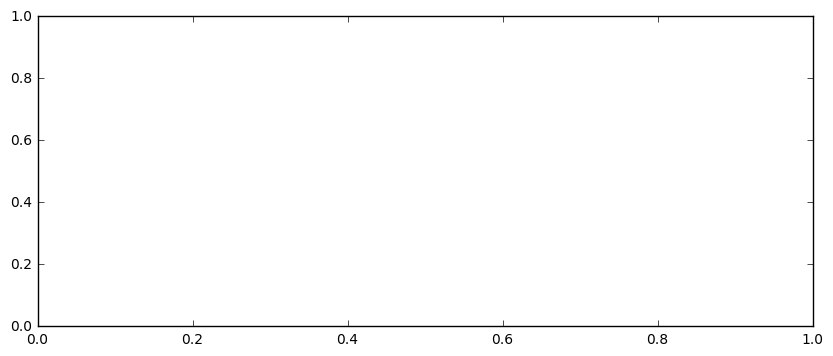

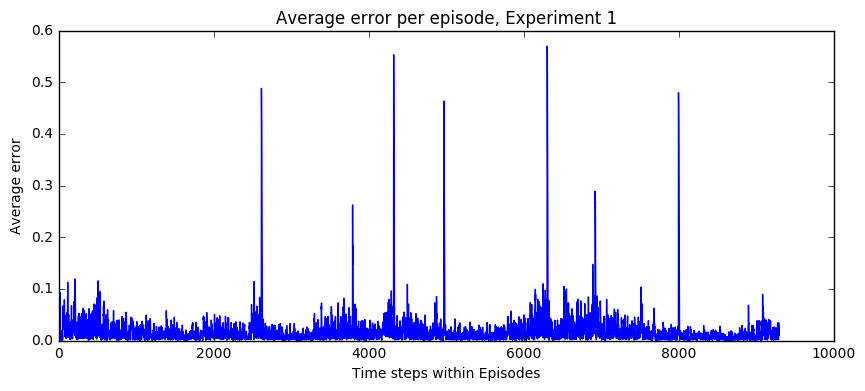

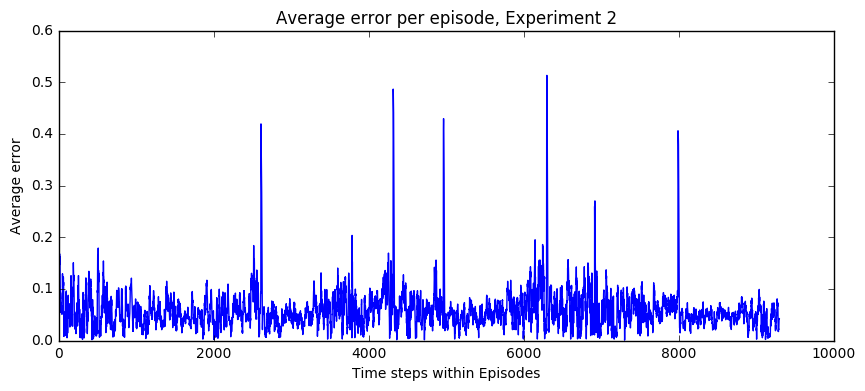

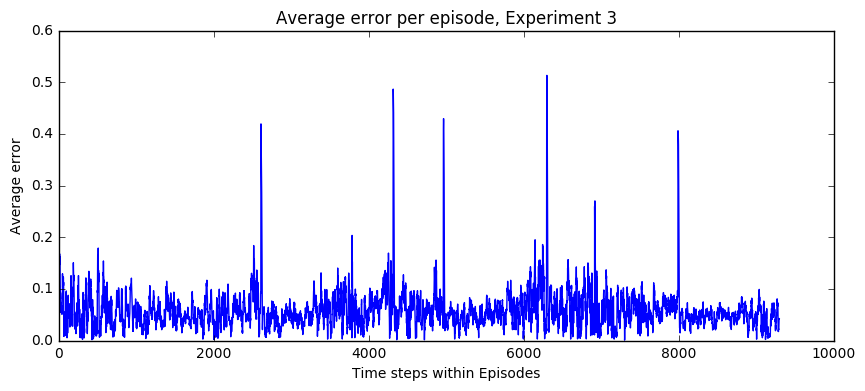

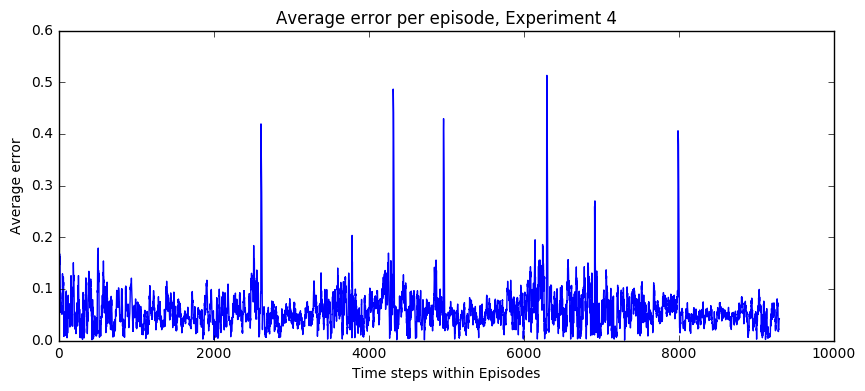

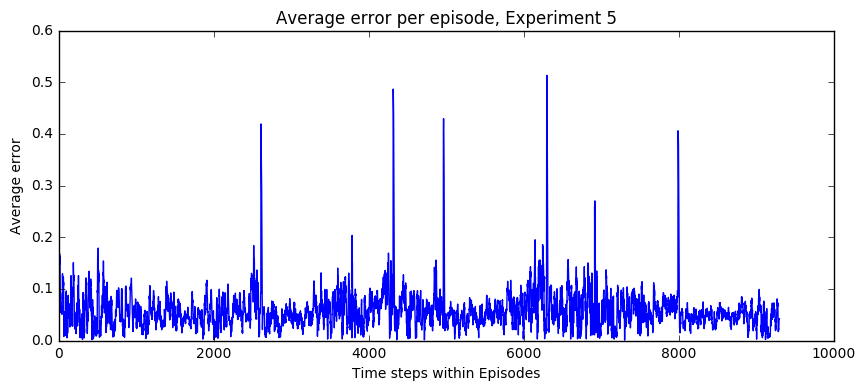

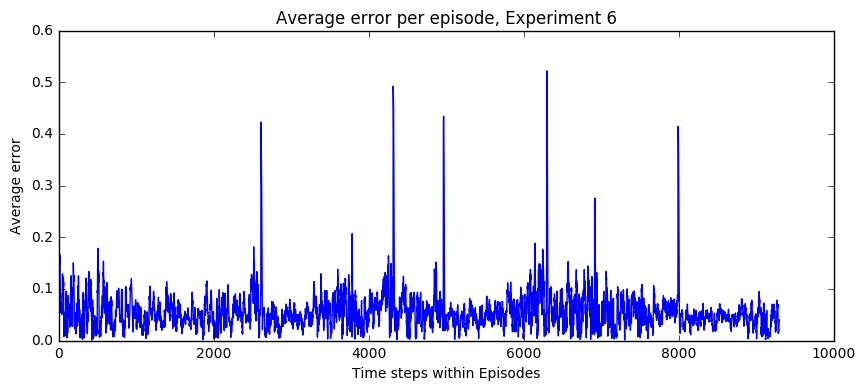

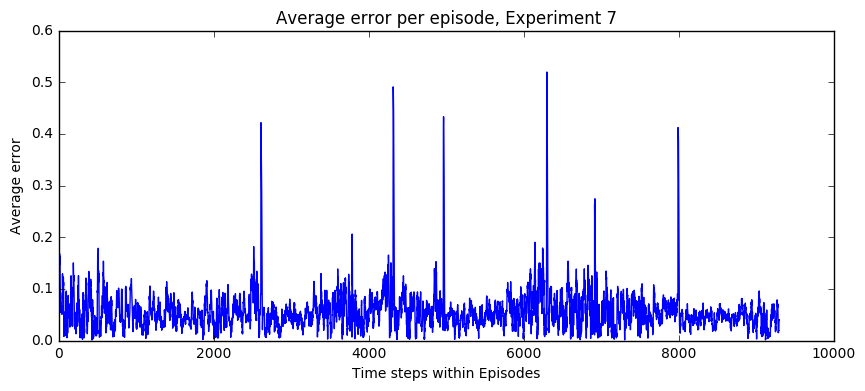

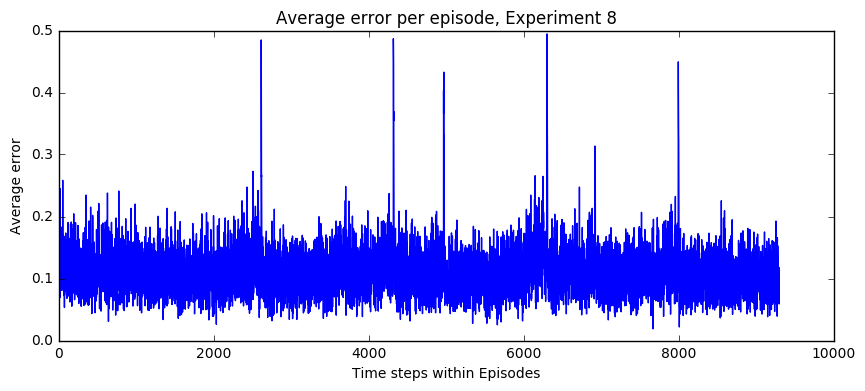

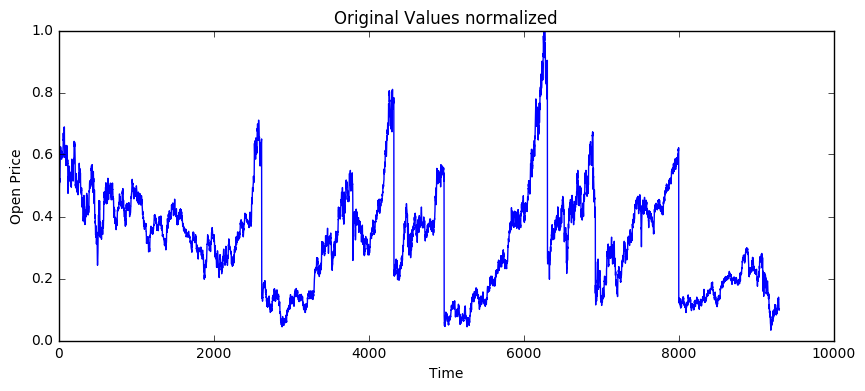

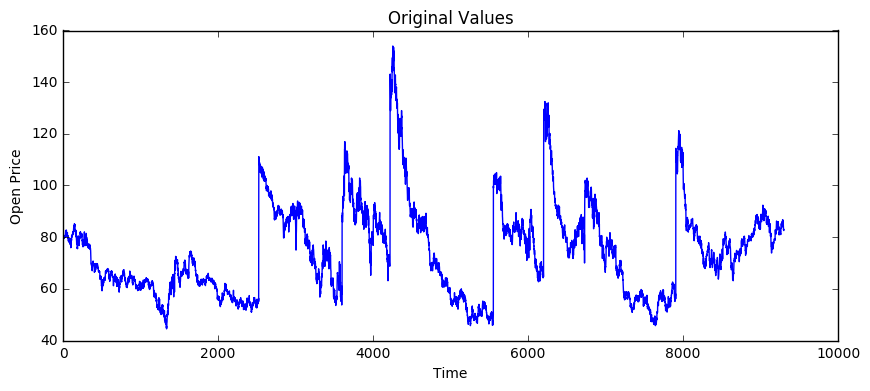

In [118]:
for mn in ['1','2','3','4','5','6','7','8']:#experiments_results.keys() : 
    
    plt.figure(figsize = (10,4))
    plt.plot(range(len(experiments_results[mn])),experiments_results[mn])
    plt.xlabel('Time steps within Episodes')
    plt.ylabel('Average error')
    plt.title('Average error per episode, Experiment %s'%mn)
    plt.show()

plt.figure(figsize = (10,4))
plt.plot(range(t_end-t_start),data_array[t_start:t_end,0])
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Original Values normalized')
plt.plot()
plt.show()

plt.figure(figsize = (10,4))
plt.plot(range(t_end-t_start),dataStock[t_start:t_end])
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Original Values')
plt.plot()
plt.show()